# Airbnb New York Datenanlyse Team Bravo

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## 1 Data Understanding

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## 2 Data Cleaning

In [4]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
# Ersetzen von null values in der Spalte reviews_per_month durch 0
df['reviews_per_month'].fillna(0,inplace = True)

In [6]:
# Ersetzen der Nullwerte durch Platzhalter
df['name'].fillna("$",inplace=True)
df['host_name'].fillna("#",inplace=True)

In [7]:
# Dropen der Nullwerte der Spalte "last_review"
df.drop(['last_review'],axis=1,inplace=True)

In [8]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [9]:
df.to_csv('AB_NYC_2019(cleaned).csv')

## 3 Data Visualisation

### 3.1 Neighbourhood

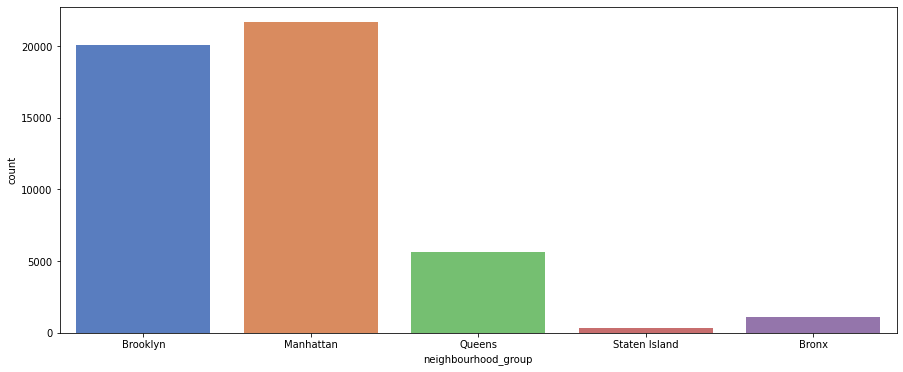

In [10]:
# Anzahl der Airbnb's in den verschiedenen Nachbarschaftsgruppen 

f,ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(df.neighbourhood_group,palette="muted")
plt.show()

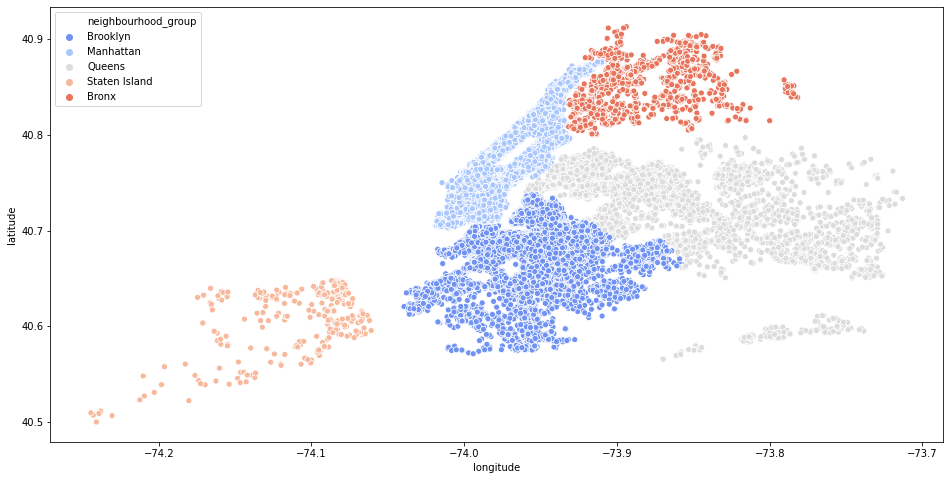

In [11]:
# Darstellung der verschiedenen Nachbarschaftsgruppen

f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df.latitude,x=df.longitude,hue=df.neighbourhood_group,palette="coolwarm")
plt.show()

### 3.2 Room Types

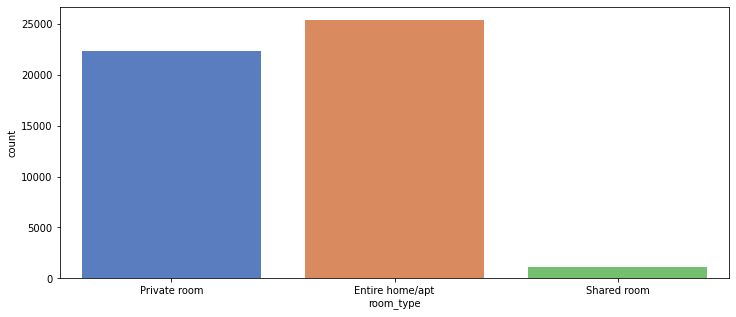

In [12]:
# Anzahl der verschiedenen Zimmer Arten

f,ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(df.room_type,palette="muted")
plt.show()

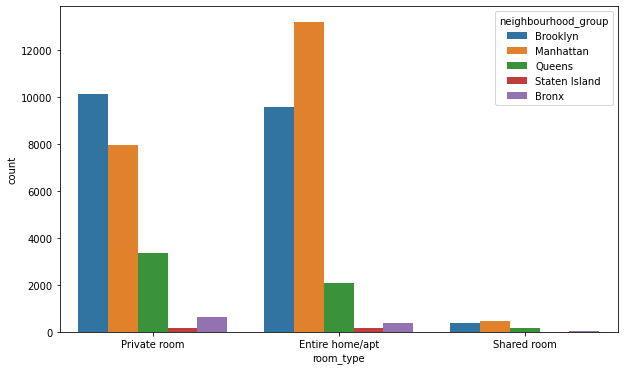

In [13]:
# Room Type nach Stadtteil aufgeteilt

plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'room_type', hue = 'neighbourhood_group')

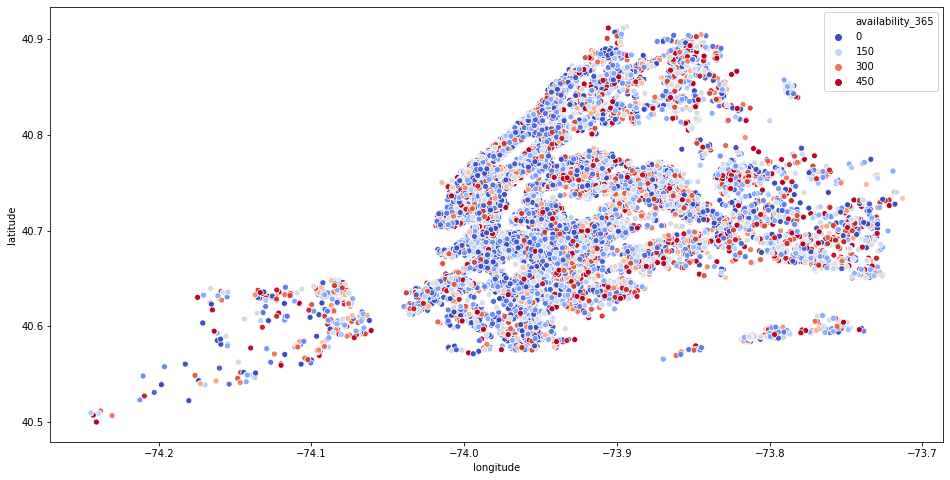

In [14]:
# Verfügbarkeit der Zimmer

f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df.latitude,x=df.longitude,hue=df.availability_365,palette="coolwarm")
plt.show()

In [15]:
# 365 Tage Verfügbarkeit
#list = df[df.availability_365 == 365 & df.room_type == "Entire home/apt"]
list = df.loc[df['room_type'] == "Entire home/apt"]
list2 = list[list.availability_365 == 365]
len(list2)

485

In [16]:
list

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48879,36480292,Gorgeous 1.5 Bdr with a private yard- Williams...,540335,Lee,Brooklyn,Williamsburg,40.71728,-73.94394,Entire home/apt,120,20,0,0.00,1,22
48880,36481315,The Raccoon Artist Studio in Williamsburg New ...,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,120,1,0,0.00,3,365
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,0.00,1,176
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,0.00,3,365


In [17]:
# 365 Tage verfügbar und Entire Home
list2

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
164,40453,Charming & Cozy midtown loft any WEEK ENDS !!!,174025,Sylvia,Manhattan,Upper East Side,40.76123,-73.96420,Entire home/apt,250,3,4,0.08,1,365
181,45910,Beautiful Queens Brownstone! - 5BR,204539,Mark,Queens,Ridgewood,40.70382,-73.89797,Entire home/apt,350,8,10,0.11,5,365
201,53477,3 floors of luxury!,204539,Mark,Queens,Middle Village,40.71546,-73.87854,Entire home/apt,265,7,38,0.38,5,365
229,59121,"Nice, clean, safe, convenient 3BR",204539,Mark,Queens,Ridgewood,40.70411,-73.89934,Entire home/apt,140,14,1,0.01,5,365
235,60611,SpaHa Studio Monthly Rental,292204,Blanca,Manhattan,East Harlem,40.79163,-73.94573,Entire home/apt,125,28,183,1.83,2,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48558,36315537,Luxurious Apartment in a Brooklyn Brownstone,273108831,RoseMarie,Brooklyn,Bedford-Stuyvesant,40.69150,-73.93590,Entire home/apt,275,3,0,0.00,1,365
48744,36415840,A BEAUTIFUL SPACE IN HEART OF WILLIAMSBURG,223715460,Simon And Julian,Brooklyn,Williamsburg,40.71091,-73.96560,Entire home/apt,499,30,0,0.00,1,365
48844,36453952,West Village Studio on quiet cobblestone street,115491896,Will,Manhattan,West Village,40.73620,-74.00827,Entire home/apt,205,1,0,0.00,1,365
48880,36481315,The Raccoon Artist Studio in Williamsburg New ...,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,120,1,0,0.00,3,365


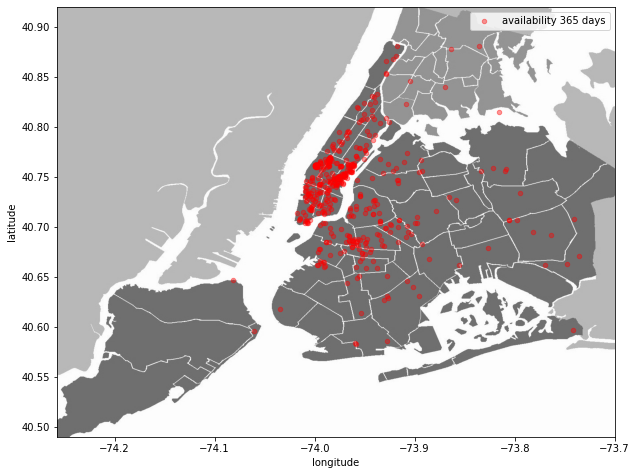

In [18]:
plt.figure(figsize=(10,8))
# Bild laden
nyc_img=plt.imread('NYC.jpg')
# Bild skalieren nach latitude und longitude
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
# scatterplot benutzen
list2.plot(kind='scatter', x='longitude', y='latitude', label='availability 365 days', ax=ax, 
        alpha=0.4, zorder=5, color="red")

plt.legend()
plt.show()

In [19]:
list3 = list2.groupby([list2.host_id]).count()
list4 = list3[list3.id > 1]
list4.iloc[:, 0:1]

,id
host_id,
68890,2
204539,3
319077,3
831185,2
836168,3
914838,3
1177497,2
1475015,18
2856748,7


In [20]:
len(list4)

37

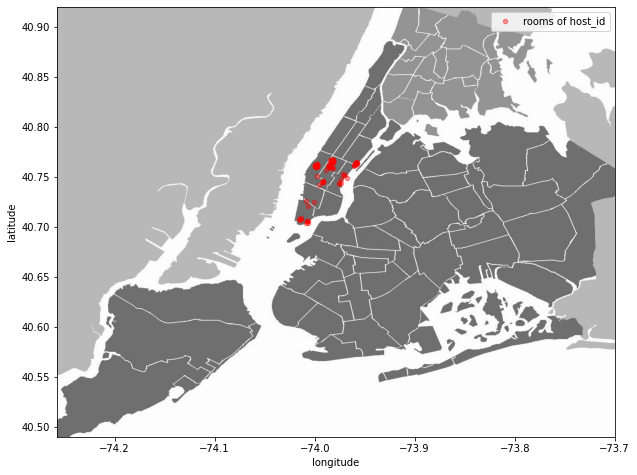

In [21]:
plt.figure(figsize=(10,8))
# Bild laden
nyc_img=plt.imread('NYC.jpg')
# Bild skalieren nach latitude und longitude
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
# scatterplot benutzen
list5 = df[df.host_id == 30283594]
list5.plot(kind='scatter', x='longitude', y='latitude', label='rooms of host_id', ax=ax, 
        alpha=0.4, zorder=5, color="red")

plt.legend()
plt.show()

In [22]:
list6 = df.groupby([df.latitude,df.longitude]).count()
list7 = list6[list6.id > 1]
list7.iloc[:, 0:1]

,,id
latitude,longitude,
40.67825,-73.92346,2
40.68398,-73.94101,2
40.70125,-73.91051,2
40.70818,-73.94952,2
40.71145,-73.95302,2
40.71232,-73.94220,3
40.71353,-73.96216,2
40.71603,-73.96417,2
40.72145,-73.97881,2


In [23]:
list8 = df[df.duplicated(['longitude','latitude'])]
list8

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11314,8783567,Studio Apt on The Upper West Side,46039971,Brady,Manhattan,Upper West Side,40.77874,-73.98437,Entire home/apt,190,5,15,0.35,1,0
12313,9513278,Sunny and chic SoHo apartment,49293535,Aleksandra,Manhattan,SoHo,40.72741,-74.00178,Entire home/apt,185,3,2,0.05,1,0
17472,13757434,"PRIVATE LARGE STUDIO FOR YOU, PLUS!",46644337,Sha,Brooklyn,Bedford-Stuyvesant,40.68398,-73.94101,Entire home/apt,90,2,113,3.08,3,262
20094,16087406,2 BDRM Presidential Reserve at Wyndham Midtown 45,69545883,Chayla,Manhattan,Midtown,40.75368,-73.97358,Private room,1599,3,2,0.08,12,365
21706,17447168,"Private Sunny Room in Williamsburg, Brooklyn - NY",30054890,Gary,Brooklyn,Williamsburg,40.70818,-73.94952,Private room,56,2,4,0.14,2,0
23324,18879379,Time Square private studio,3291930,Mark,Manhattan,Hell's Kitchen,40.75888,-73.99077,Entire home/apt,155,1,0,0.00,1,0
28876,22267769,Cosy room in a cool Williamsburg Apt,72593389,Jeremy,Brooklyn,Williamsburg,40.71353,-73.96216,Private room,60,2,1,0.05,1,0
28991,22316496,Cozy private room in the heart of Nolita / Soho,8726000,Larasati,Manhattan,Nolita,40.72347,-73.99302,Private room,70,2,2,0.11,1,0
29883,23002312,Park Ave Apt in the Heart of NYC,42677381,Anna,Manhattan,Murray Hill,40.74882,-73.97788,Entire home/apt,250,3,9,0.57,1,0
31740,24751420,Cozy and Spacious Studio in Columbus Circle,130965770,Joshua,Manhattan,Hell's Kitchen,40.76914,-73.98757,Entire home/apt,180,1,43,4.37,1,2


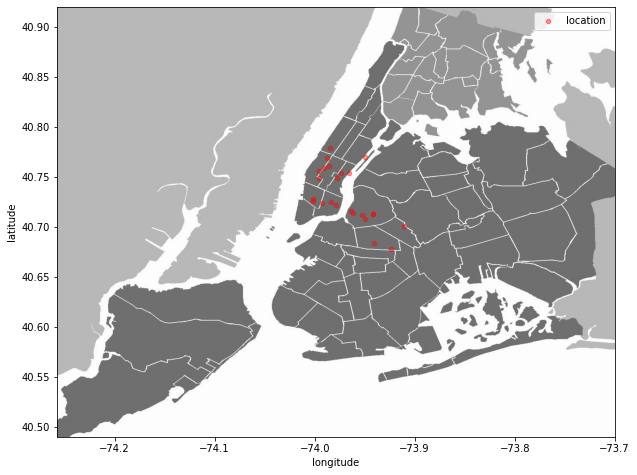

In [24]:
plt.figure(figsize=(10,8))
# Bild laden
nyc_img=plt.imread('NYC.jpg')
# Bild skalieren nach latitude und longitude
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
# scatterplot benutzen
list8.plot(kind='scatter', x='longitude', y='latitude', label='location', ax=ax, 
        alpha=0.4, zorder=5, color="red")

plt.legend()
plt.show()

https://www.rosenbergestis.com/articles/three-issues-with-airbnb-in-new-york-city/

### 3.3 Preisverteilung

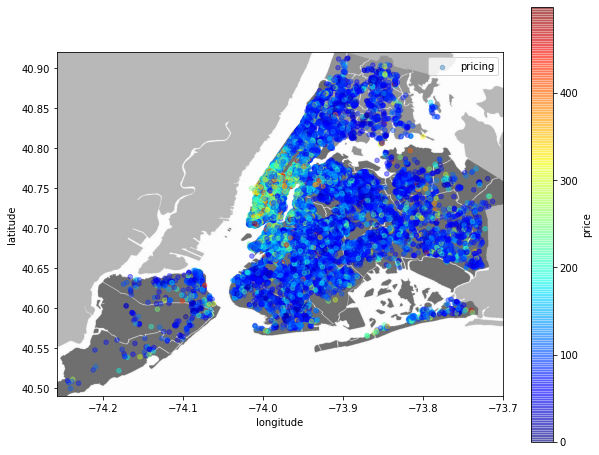

In [26]:
list9=df[df.price < 500]

plt.figure(figsize=(10,8))
# Bild laden
nyc_img=plt.imread('NYC.jpg')
# Bild skalieren nach latitude und longitude
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
# scatterplot benutzen
list9.plot(kind='scatter', x='longitude', y='latitude', label='pricing', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()